              name   datetime  tempmax  tempmin  temp  feelslikemax  \
0  10.7852,79.8409 2025-01-01     84.3     78.5  80.3          91.3   
1  10.7852,79.8409 2025-01-02     83.9     74.1  79.8          89.7   
2  10.7852,79.8409 2025-01-03     82.7     72.3  78.7          86.6   
3  10.7852,79.8409 2025-01-04     83.6     71.0  78.2          88.6   
4  10.7852,79.8409 2025-01-05     83.0     71.9  78.3          88.3   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          78.5       82.3  72.2      76.7  ...         18.6        8   
1          74.1       81.0  70.6      73.7  ...         17.3        7   
2          72.3       79.8  69.6      73.9  ...         16.3        7   
3          71.0       79.2  69.3      74.3  ...         16.7        7   
4          71.9       79.2  68.3      71.8  ...         16.9        7   

   severerisk              sunrise               sunset  moonphase  \
0          10  2025-01-01T06:29:07  2025-01-01T17:59:27       0.

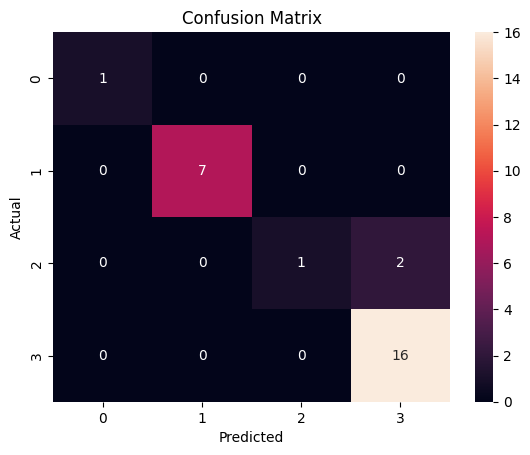

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Make sure the file path is correct)
data = pd.read_csv(r"C:\\Users\\Student\\Downloads\\10.7852,79.8409 2025-01-01 to 2025-05-11.csv")

# Convert 'datetime' to pandas datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Display basic info
print(data.head())
print(data.info())

# Drop rows with missing target (or impute them as necessary)
data = data.dropna(subset=['temp'])

# Example: Convert categorical features into numerical representations
# Let's encode 'preciptype', 'conditions', and 'icon' as they are categorical
data['preciptype'] = data['preciptype'].astype('category').cat.codes
data['conditions'] = data['conditions'].astype('category').cat.codes
data['icon'] = data['icon'].astype('category').cat.codes

# Features and target variable
# Selecting a few features for demonstration purposes
# You can add or remove features based on your goals
X = data[['temp', 'tempmax', 'tempmin', 'feelslike', 'humidity', 'precip', 'windspeed', 'windgust', 'sealevelpressure', 'cloudcover']]
y = data['conditions']  # Predicting weather conditions (numeric encoded)

# Optional: Normalize or scale features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
